In [2]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
from multistep_lstm_company import MultiStepLSTMCompany

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


date
2018-01-11    43.31
2018-01-12    42.82
2018-01-16    42.81
2018-01-17    42.92
2018-01-18    44.26
2018-01-19    43.99
2018-01-22    42.75
2018-01-23    42.88
2018-01-24    43.95
2018-01-25    43.08
2018-01-26    43.01
2018-01-29    43.67
2018-01-30    43.29
2018-01-31    41.67
2018-02-01    43.72
2018-02-02    42.49
2018-02-05    40.82
2018-02-06    39.40
2018-02-07    43.88
2018-02-08    42.01
2018-02-09    40.00
2018-02-12    40.41
2018-02-13    42.19
2018-02-14    42.63
2018-02-15    43.45
2018-02-16    43.50
2018-02-20    44.21
2018-02-21    44.90
2018-02-22    44.54
2018-02-23    44.25
              ...  
2018-12-06    36.88
2018-12-07    37.67
2018-12-10    35.31
2018-12-11    34.80
2018-12-12    35.21
2018-12-13    36.03
2018-12-14    35.02
2018-12-17    34.20
2018-12-18    33.88
2018-12-19    34.11
2018-12-20    31.41
2018-12-21    31.28
2018-12-24    30.32
2018-12-26    29.02
2018-12-27    30.89
2018-12-28    31.93
2018-12-31    31.57
2019-01-02    31.73
2019-01-03    3

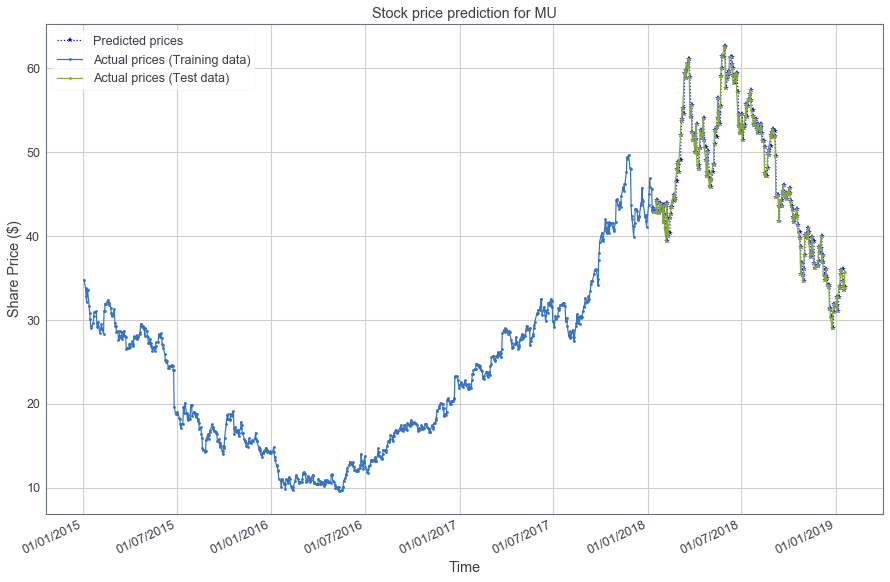

Baseline RMSE Score: 1.443 US dollar
Baseline trend Score: 0.8 %


In [5]:
start_train_date = "01/01/2015"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"
company_baseline = OneStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date)
company_baseline.train()
predictions = company_baseline.predict()
display(predictions)
company_baseline.plot(predictions)
rmse_score = company_baseline.score(metric="rmse", predictions=predictions)
print("Baseline RMSE Score: %.3f US dollar" % rmse_score)
trend_score = company_baseline.score(metric="trend", predictions=predictions)
print("Baseline trend Score: %.1f %%" % (trend_score*100))


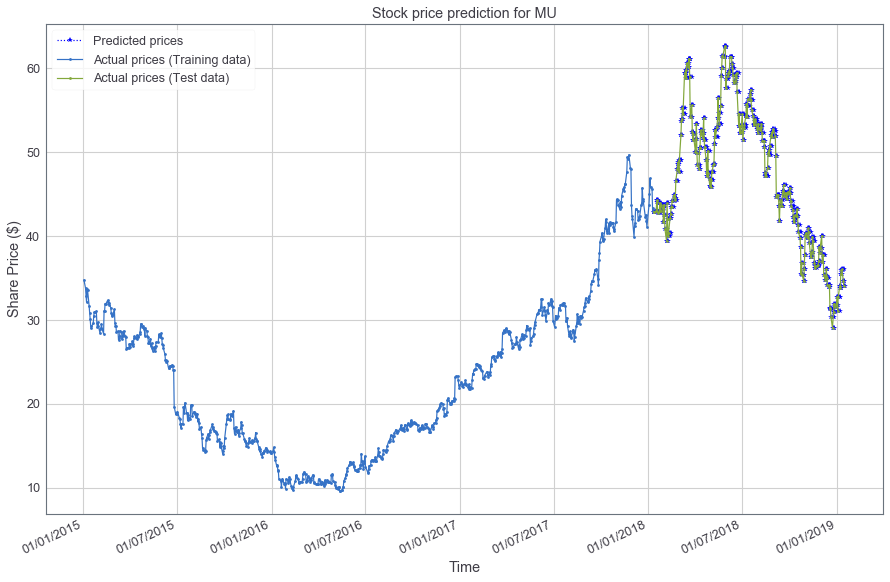

t+1 RMSE: 1.446441
t+2 RMSE: 1.775192
t+3 RMSE: 2.046544


In [6]:
# load dataset
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/03/2018"

start_train_date = "01/01/2015"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"
multi_step_baseline = MultiStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                                               n_lag=1, n_seq=3)
predictions = multi_step_baseline.predict()
#display(predictions)
#display(multi_step_baseline.test_raw_series.values)
#display(type(multi_step_baseline.test_raw_series.values))
multi_step_baseline.plot(predictions)
multi_step_baseline.score(predictions)